# Network Analysis

---


## Introduction

Networks are a measurable representation of patterns of relationhips connecting entities in an abstract or actual space. The constituent parts of a network are nodes which are connected by ties. Networks have been used to model airplane traffic from airports, supply chains, friendship networks, amorphous materials like window glass, cells, and proteins. The importance of networks analysis is that it captures the affect of where and how an individual actor is positioned among others. 

Networks can be described as graphs where a graph is made up of vertices connected by edges; more formally a graph, $G$ , is a triple $G=(V,E,e)$ where $V$ is the set of vertices, $E$ is the set of edges and $e$ is mapping of edges to the endpoints of vertices. There are several type of graphs: conneccted, unconnected, directional, etc (see glossary for a list of terms). 

In this tutorial we are going to examine the friendship network of 34 individuals in a karate class. This is an interesting dataset due to a political rivalry that arose in the class and divided the class into two factions, eventually leading to a fissure and two separate karate classes. The club would periodically hold meetings called by two leaders, 1 and 34, the heads of each faction. When one of the heads of the faction called a meeting they would communicate the information to members only firmly in their faction in order to attain a majority during the meeting time so their polices could be passed. The information of when a meeeting occured was passed from friend-to-friend in the social network. In this tutorial we will explore representations of this network, degree metrics, centrality metrics, how to calculate the shortest path between nodes, and community detection. We will be using the NetworkX Python Library developed at Los Alamos National Laboratory (LANL) for the majority of this work. 

[Dataset Link](http://www-personal.umich.edu/~mejn/netdata/)
[Original Publication](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)

## Glossary of Terms

- **Directed Graph**: A directed graph has directed ties that describe an assymetrical relationship. For instance, I may follow Barack Obama on instagram, but he may not follow me. 

- **Undirected Graph**: An undirected graph as ties that describe a symmetrical relationship. For instance, if I am facebook friends with Barack Obama then he is also facebook friends with me.

- **Ties**: An link between nodes. A directed tie is known as an arc. An undirected tie is known as an edge.  
- **Walk**: A walk in a unrestricted route between two vertices. 
- **Trail**: A trail between two vertices is a route in which no edge is repeated. 
- **Paths**: A path between two vertices is a route in which no nodes are repeated. 
- **Cutpoints**: A cutpoint is node then when removed disconnects parts of the network. 
- **Bridge**: A bridge is tie that when removed diconnects the network. 
- **Network Density**: This is the number of actual connections/potential connections. 
- **Average Distance**: This is the average path length between nodes in a graph. It is a measure of how many nodes it take to transmit information across the network. 
- **Centrality**: The degree to which a network revolves around a given node. 

## Table of Contents

1. [Load the Data](#Load-the-data)
2. [Representation of Networks](#Representations-of-Networks)
    1. [Adjacency Matrix](#Adjacency-matrix)
    2. [List of edges](#List-of-edges)
    3. [Graphs](#Graphs)
3. [Summary Statistics](#Summary-Statistics)
4. [Degree Distribution](#Degree-Distribution)
5. [Shortest Paths](#Shortest-Paths)
    1. [Average Shortest Path Length](#Average-Shortest-Path-Length)
6. [Centrality](#Centrality)
    1. [Degree Centrality](#Degree-Centrality)
    2. [Closeness Centrality](#Closeness-Centrality)
    3. [Betwenness Centrality](#Betwenness-Centrality)
7. [Community Detection](#Community-Detection)

In [3]:
%pylab inline
from __future__ import print_function
import sys
import community
import networkx as nx
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Load the data 

Our data comes from a social network analysis of a karate class. The nodes represent individuals and the ties represent freindships. The data is stored in [gml format](https://en.wikipedia.org/wiki/Graph_Modelling_Language)

In [4]:
Graph_Karate = nx.read_gml('karate.gml', label='id')
Graph_Karate.name = 'SocialCircles_KarateClass'

# Representations of Networks

There are serveral ways to represent networks. 

## Adjacency matrix
One of them is an adjacency matrix. An adjacenty matrix is a binary square matrix. Each row represents the connections to other nodes in the network. For instance, the first row represents the first node. The columns represent possible connections to the other nodes as indicated by 1 (connected) or 0 (not connected).  

In [5]:
adj_matrix = nx.adjacency_matrix(Graph_Karate).todense()
np.set_printoptions(threshold=numpy.nan)
print(adj_matrix)

[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 

We can also plot the adjacency matrix as a heat map.

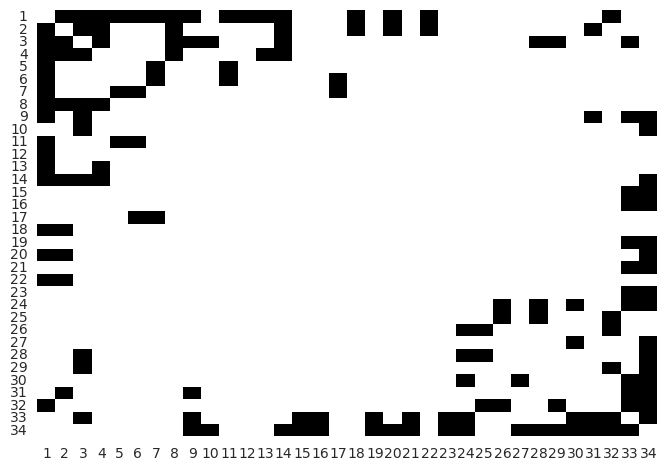

In [11]:
sns.heatmap(adj_matrix,
            cbar=False,
            cmap = plt.get_cmap('Greys'),
            yticklabels=Graph_Karate.nodes(),
            xticklabels=Graph_Karate.nodes(),
            fmt='d')

## List of edges
Graphs can also be represented as edge lists where list represents connections between nodes 

In [5]:
nx.write_edgelist(Graph_Karate,
                 sys.stdout)

1 32 {}
1 2 {}
1 3 {}
1 4 {}
1 5 {}
1 6 {}
1 7 {}
1 8 {}
1 9 {}
1 11 {}
1 12 {}
1 13 {}
1 14 {}
1 18 {}
1 20 {}
1 22 {}
2 3 {}
2 4 {}
2 8 {}
2 14 {}
2 18 {}
2 20 {}
2 22 {}
2 31 {}
3 4 {}
3 33 {}
3 8 {}
3 9 {}
3 10 {}
3 14 {}
3 28 {}
3 29 {}
4 8 {}
4 13 {}
4 14 {}
5 11 {}
5 7 {}
6 11 {}
6 17 {}
6 7 {}
7 17 {}
9 34 {}
9 33 {}
9 31 {}
10 34 {}
14 34 {}
15 33 {}
15 34 {}
16 33 {}
16 34 {}
19 33 {}
19 34 {}
20 34 {}
21 33 {}
21 34 {}
23 33 {}
23 34 {}
24 33 {}
24 26 {}
24 28 {}
24 34 {}
24 30 {}
25 32 {}
25 26 {}
25 28 {}
26 32 {}
27 34 {}
27 30 {}
28 34 {}
29 32 {}
29 34 {}
30 33 {}
30 34 {}
31 34 {}
31 33 {}
32 34 {}
32 33 {}
33 34 {}


## Graphs
Lastly networks can be represented as Graphs, what we are most familiar with. 

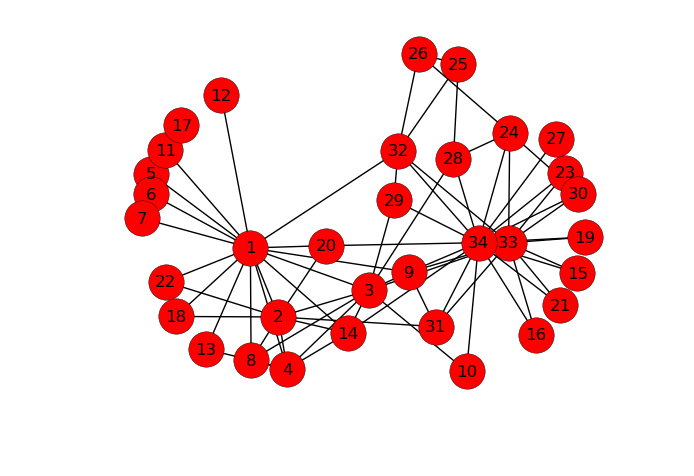

In [6]:
spring_pos = nx.spring_layout(Graph_Karate)
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                pos=spring_pos,
                with_labels = True,
                node_size=650,
                label='Friendship Network')

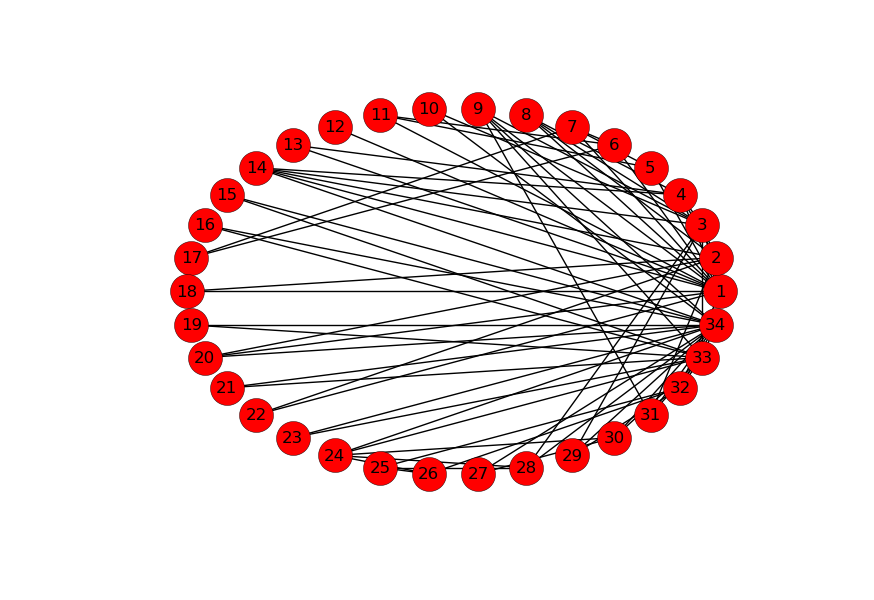

In [7]:
nx.draw_circular(Graph_Karate, 
                 with_labels=True,
                node_size=600)

# Summary Statistics 

We see that there are 34 individuals (nodes) and 78 friendships (edges). The average degree is the average number of edges connecting each node. In this context, each person in the class has on average 4.6 friends.   

In [8]:
print( nx.info(Graph_Karate) )

Name: SocialCircles_KarateClass
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [10]:
print(nx.density(Graph_Karate))

0.139037433155


The average density of the network is 0.14 which indicates it is not a very dense network. 

The average density is calculated as the $$\text{average density} = \frac{\text{actual ties}}{\text{possible number of ties}} $$ where the possiblie number of ties for an undirected graph is $\frac{n(n-1)}{2}$ 

# Degree Distribution 

Q: Who has the most friends?

We can cast this as a networks problem by asking which node has the most edges. 

In [9]:
dict_degree = Graph_Karate.degree()
df_degree = pd.DataFrame.from_dict(dict_degree, orient='index')
df_degree.columns=['degree']
df_degree.index.name = 'node_id'

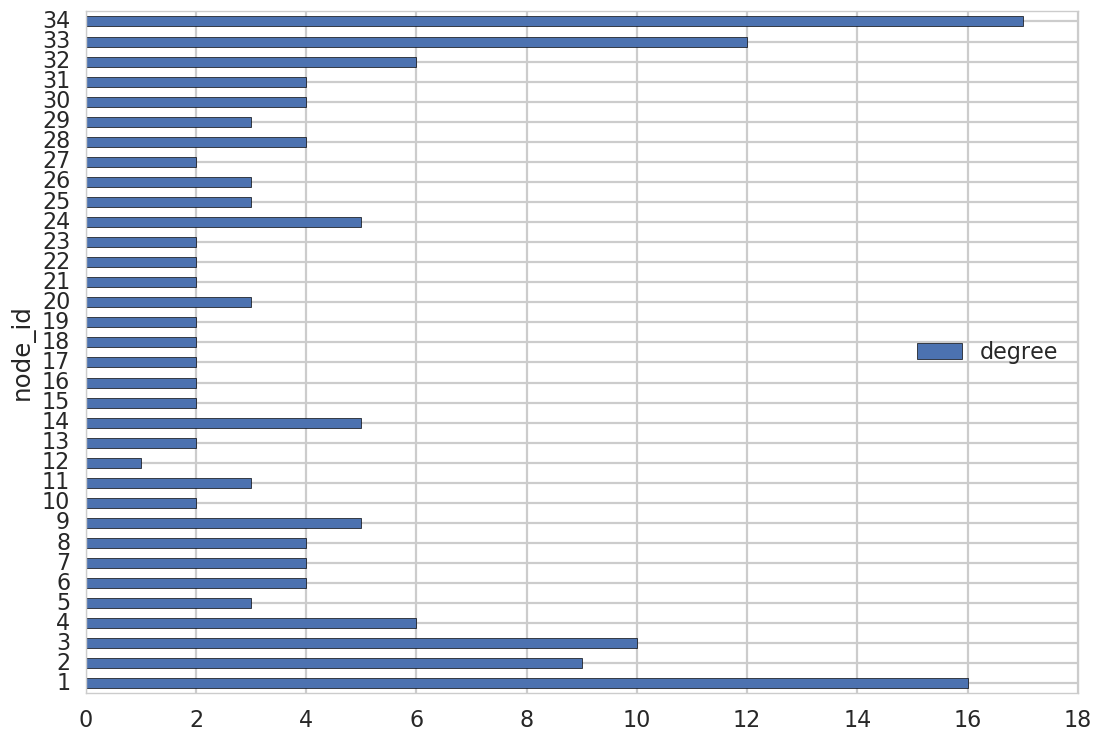

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.00, rc={"lines.linewidth": 1.00,"lines.markersize":8})
df_degree.plot(kind='barh')

From this figure we can see that node 1,34 and 33 are the most connected and have the most friendships out of the group. 12 is the only individual that has only one connection. There are a few with 10 friends and the rest have around 2 to 5 friendships in the class. We expect 1 and 34 to have the most social connections due to being the leaders of the rival factions which we can see from the data. 

# Shortest Paths

The shortest path between two nodes is the smallest set of nodes that you must hop from to get to the other node where you cannot repeat nodes. This can indicate how many people it takes to broker an introduction. Think [six-degrees-of-kevin-bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon)

In [11]:
#shortest path length
ls_path = nx.shortest_path(Graph_Karate, 12,15)
print('The path length from {} to {} is {}.'.format(
                                            12,15,len(ls_path)))
print('path length: ', ls_path)

The path length from 12 to 15 is 5.
path length:  [12, 1, 32, 33, 15]


## Average Shortest Path Length

A measure of how quickly information or goods can transfer through a network.

The average shortest length is defined as $$ l = \frac{1}{n(n-1)} \sum_{i \ne j}d(v_{i},v_{j}) $$ where $n$ is the number of vertices and $d(v_{i},v_{j})$ is the shortest path length between vertices $i$ and $j$. 

In [12]:
print(nx.average_shortest_path_length(Graph_Karate))

2.40819964349


The average shortest path is 2.5 nodes which implies information can be transferred between on any two nodes on average between 2.5 people. 

# Centrality

Centrality metrics measure how important a node is or how "central" it is to the network. This can indicate what individual has the most social contacts, who is closest socially to the most amount of people, or the person where information most transfers through. There are many centrality metrics -- degree centrality, betweenness centrality, closeness centrality, eigenvalue centrality, percolation centrality, PageRank -- that all capture different aspects of a node's contribution to a network. Typically a centrality metric is used to to identify a few import nodes but does not generalize to all nodes in the network. This is akin to Google's search results where the first few matches are the most releveant and the rest of the matches fall-off in relevance.

## Degree Centrality

In degree centrality, the node with the most connections is considered to be the most important. 

$$C_{d}(n) = \frac{deg(n)}{n-1}$$ where $n$ is a node and $deg(n)$ is the number connections that node has, $n-1$ is a normalzation factor that is the total amount of possible connections. In our case, it is the person with the most friends.

In [13]:
dict_degree_centrality = nx.degree_centrality(Graph_Karate)
df_degree_centrality = pd.DataFrame.from_dict(dict_degree_centrality, orient='index')
df_degree_centrality.columns=['degree_centrality']
df_degree_centrality.index.name = 'node_id'

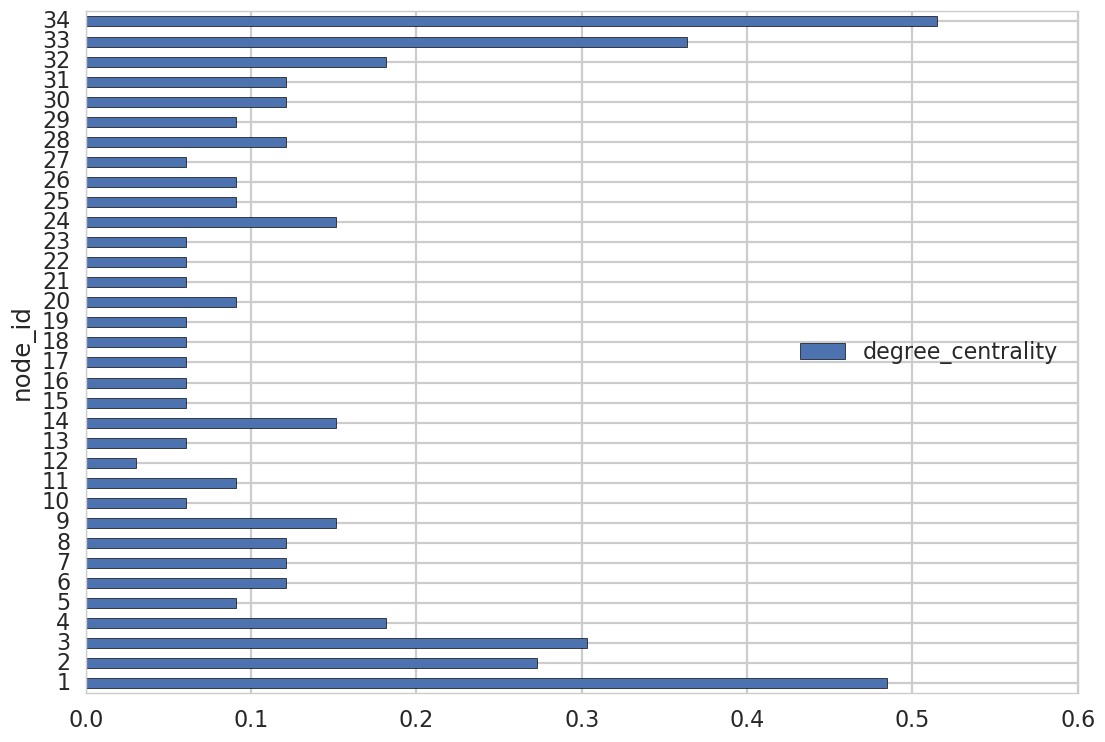

In [14]:
df_degree_centrality.plot(kind='barh')

As we can see this is a reacasting of the degree distribution where 1 and 34 have the largest degree centralities and have the largest freindships.

## Closeness Centrality

Closeness Centrality is calculated by calculating the shortest path between a given a node and all other nodes $$C(x) = \frac{1}{\sum_{y}d(x,y)} $$
where $d(x,y)$ is the shortest path between node x and y.

In [15]:
dict_closeness_centrality = nx.closeness_centrality(Graph_Karate)
df_closeness_centrality = pd.DataFrame.from_dict(dict_closeness_centrality,
                                                 orient='index')
df_closeness_centrality.columns=['closeness_centrality']
df_closeness_centrality.index.name = 'node_id'

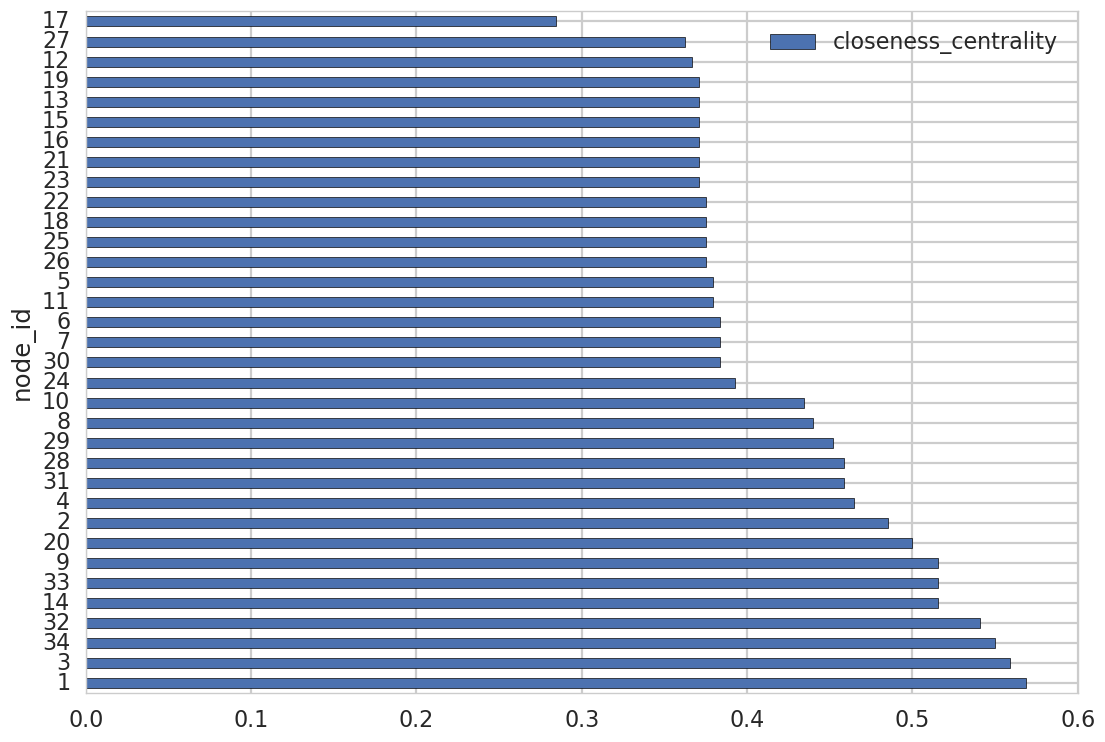

In [16]:
df_closeness_centrality.sort_values(by='closeness_centrality',
                                   ascending=False).plot(kind='barh')

From this distribution 32, 34, 3 and 1 have the highest centrality closeness. This implies that these individuals have the shortest paths to all other members in the network. 

## Betwenness Centrality

Betwenness Centrality calculates how many shortest paths a node is a part of. It is calculated by computing the shortest path between nodes. For each pair of nodes determine the fraction of shortest paths that the node in question. Sum the fraction over all pairs of nodes,
$$ C_{n} = \sum \frac{\sigma_{st}(n)}{\sigma_{st}}$$ where $\sigma_{st}$ is the number of shortest paths from s to t, $\sigma_{st}(n)$ is the number of shortest paths that pass through $n$. 

In [17]:
dict_betweenness_centrality = nx.betweenness_centrality(Graph_Karate)
df_betweenness_centrality = pd.DataFrame.from_dict(dict_betweenness_centrality,
                                                 orient='index')
df_betweenness_centrality.columns=['betweeness_centrality']
df_betweenness_centrality.index.name = 'node_id'

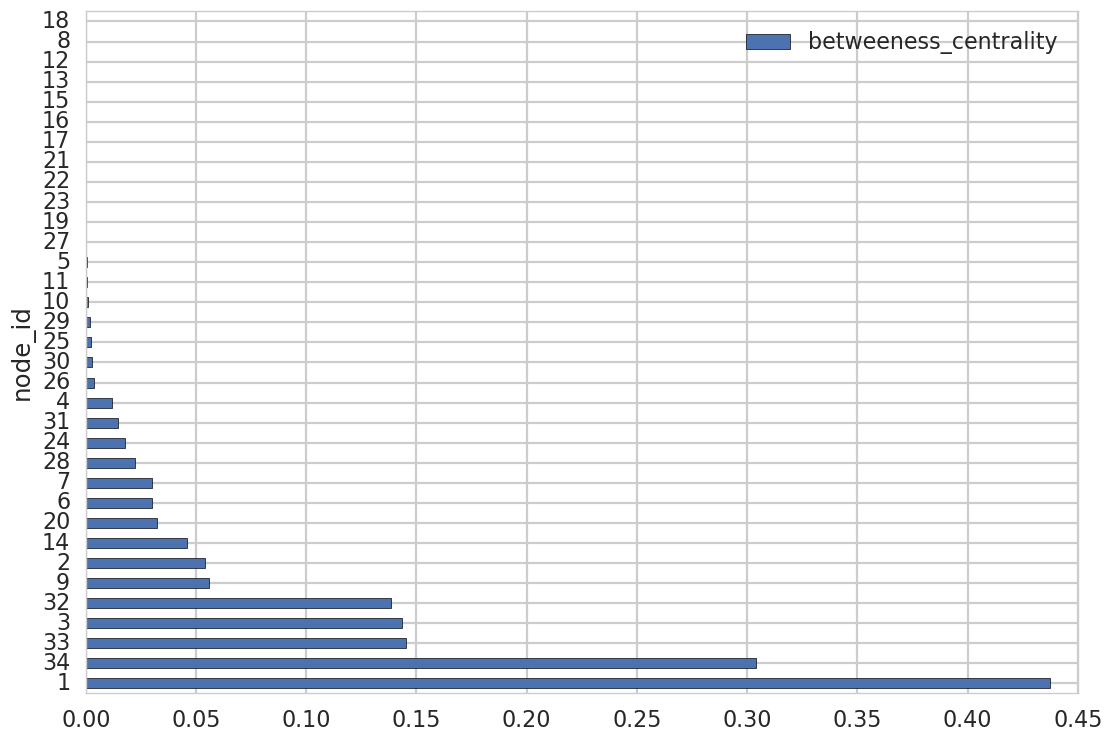

In [18]:
df_betweenness_centrality.sort_values(by='betweeness_centrality',
                                   ascending=False).plot(kind='barh')

The people with the highest betwenness centrality are 34 and 1 which we expect due to their high connectivity. 

# Community Detection 

In community detection, we are often trying to find sub-networks or communities of of densely populated connections. Community Detection is similiar to clustering in that good communities have an abundance of intra-community connections and few inter-community connections. We are going to see if we can find the communities that were in 1's and 34's camp. 

The technical implementation of the algorithm can be found [here](https://arxiv.org/pdf/0803.0476v2.pdf).  

1's Faction: [1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]

34's Faction: [9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34]

from the published paper linked above. 

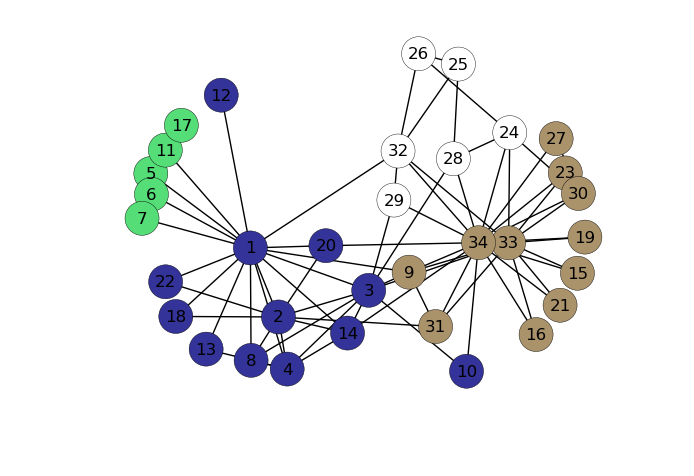

In [18]:
dict_clusters = community.best_partition(Graph_Karate,resolution=1.0)
clusters = [dict_clusters.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap = plt.get_cmap("terrain"),
                 node_color = clusters, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)

We have found 4 different sub-clusters within the network. We know that the Karate Class fractured into two different sub-clusters. Let's combine the sub-clusters into two-subclusters and see how we do. 

In [14]:
make_new_clust = lambda x: 0 if x < 2 else 1
dict_new_clust = {key: make_new_clust(dict_clusters[key]) for key in dict_clusters}

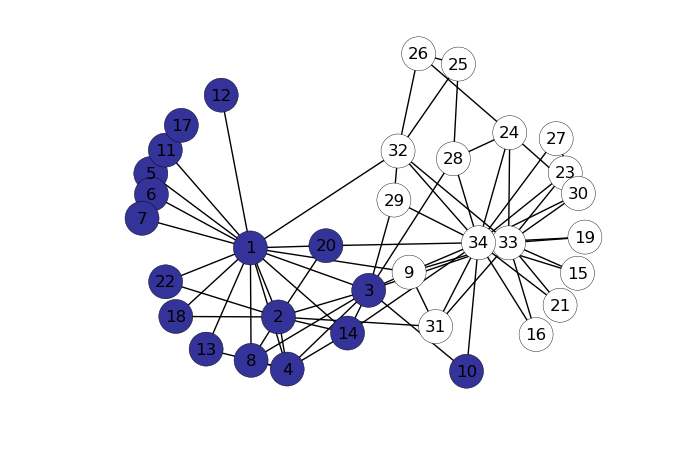

In [19]:
ls_new_clust = [dict_new_clust.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap=plt.get_cmap("terrain"),
                 node_color = ls_new_clust, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)

If we look at the alliances given in the original paper we can see that we can properly identify the alliances with 1 and 34 with the exeption of 10. 10 seems to be a case that had close social ties to both 1 and 34.  

[Back to TOC](#Table-of-Contents)